In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [2]:

root_path = "/home/cdq/FedPet/log/yelp-full/all_1000/seed_42/pattern_0/alpha_1_beta_0_gamma_0.001"
filenames = ["new_all_aug_4_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_8_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_16_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_32_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_64_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
"new_all_aug_100_conver_0_limit_0.0_fedpet_256_32_roberta-large.log",
]


new_all_aug_4_conver_0_limit_0.0_fedpet_256_32_roberta-large.log 0.936936936936937
[0.936936936936937]
new_all_aug_8_conver_0_limit_0.0_fedpet_256_32_roberta-large.log 0.8861647361647361
[0.936936936936937, 0.8861647361647361]
new_all_aug_16_conver_0_limit_0.0_fedpet_256_32_roberta-large.log 0.8923541247484909
[0.936936936936937, 0.8861647361647361, 0.8923541247484909]
new_all_aug_32_conver_0_limit_0.0_fedpet_256_32_roberta-large.log 0.8767420853746084
[0.936936936936937, 0.8861647361647361, 0.8923541247484909, 0.8767420853746084]
new_all_aug_64_conver_0_limit_0.0_fedpet_256_32_roberta-large.log 0.8756716625005222
[0.936936936936937, 0.8861647361647361, 0.8923541247484909, 0.8767420853746084, 0.8756716625005222]
new_all_aug_100_conver_0_limit_0.0_fedpet_256_32_roberta-large.log 0.8707591023496767
[0.936936936936937, 0.8861647361647361, 0.8923541247484909, 0.8767420853746084, 0.8756716625005222, 0.8707591023496767]


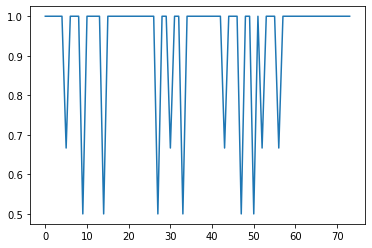

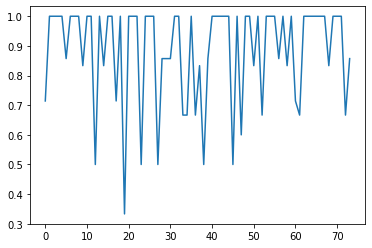

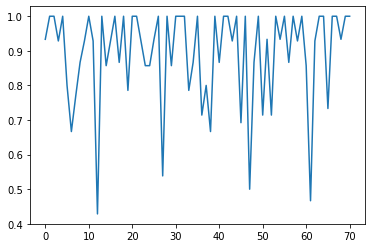

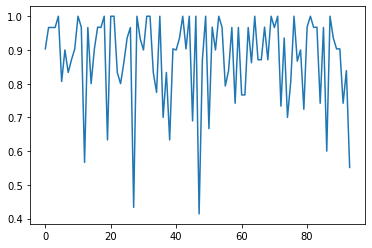

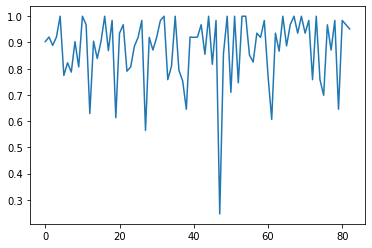

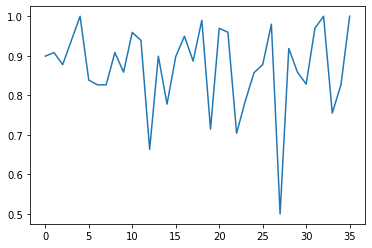

In [3]:
# correct ratio
ratio = []
for filename in filenames:
    log_path = os.path.join(root_path, filename)
    fig = plt.figure()
    # plt.title(log_path)
    iter = 1000

    phrase = 'After correct: Inference correct ratio is'
    with open(log_path) as f:
        f = f.readlines()
    df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
    gen = 0
    for line in f:
        
        if phrase in line:
            # gen = int(re.findall(r'Gen (.+?) ',line)[0])
            
            acc = float(re.findall(r'is ?(\d+\.\d+)',line)[0])
            df[0][gen]=acc
            gen = gen + 1

    df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
    if df.empty:
        print(f"Bug: {log_path}")

    # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
    iter = len(df.index)
    y_mean = []
    for j in range(iter):
        y = np.array(df.iloc[j])

        y_mean.append(pd.DataFrame(y).dropna().mean())
        # plt.scatter(j, y)
            
    plt.plot(range(iter),y_mean)
    # plt.savefig("../fig/b.png")

    y = [float(x) for x in y_mean]
    print(filename, np.mean(y))
    ratio.append(np.mean(y))
    print(ratio)

0.8123651374425368